In [4]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

In [5]:
my_img_path = 'Images/Inter/Inter-Regular2.jpg'

In [6]:
def recognize_text(img_path):   
    reader = easyocr.Reader(['ru'])
    return reader.readtext(img_path)

In [16]:
def overlay_ocr_text(img_path):
    
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    
    result = recognize_text(img_path)

    for (bbox, text, prob) in result:
        if prob >= 0.5:
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)
            
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
        
    axarr[1].imshow(img)


Detected text: ЫсгфяЦ (Probability: 0.69)


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


<Figure size 432x288 with 0 Axes>

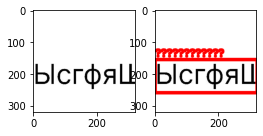

In [17]:
overlay_ocr_text(my_img_path)

In [18]:
result = recognize_text(my_img_path)
for (bbox, text, prob) in result:
    (top_left, top_right, bottom_right, bottom_left) = bbox

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [22]:
left = top_left[0]
upper = top_left[1]
right = bottom_right[0]
lower = bottom_right[1]

box=(left, upper, right, lower)

In [24]:
im = Image.open(my_img_path)
im_crop = im.crop(box)

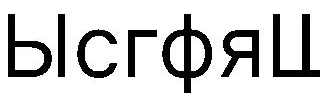

In [25]:
im_crop

In [34]:
from PIL import Image 

def make_square(old_img, new_path, max_size, fill_color):
    # find image dimensions
    #old_img = Image.open(old_path)
    size = (min(max_size, max(old_img.size)),) * 2

    # resize if old image is larger than max_size
    if size[0] < old_img.size[0] or size[1] < old_img.size[1]:
        old_img.thumbnail(size)

    # create new image with the given color and computed size
    new_img = Image.new(old_img.mode, size, fill_color)

    # find coordinates of upper-left corner to center the old image in the new image
    assert new_img.size[0] >= old_img.size[0]
    assert new_img.size[1] >= old_img.size[1]

    x = (new_img.size[0] - old_img.size[0]) // 2
    y = (new_img.size[1] - old_img.size[1]) // 2

    # paste image
    new_img.paste(old_img, (x, y))

    # save image
    #new_img.save(new_path)
    
    return new_img

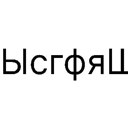

In [38]:
make_square(im_crop, 'square_', 128, 255)